In [4]:
import os, time, sys
import tables as tb
import matplotlib.pyplot as plt
import numpy as np
import clicfast2023.clicfast2023 as clicfast2023
!ping -c 1 192.168.10.16

dut = clicfast2023.Clicfast2023()
dut.init()

PING 192.168.10.16 (192.168.10.16) 56(84) bytes of data.
From 192.168.10.1 icmp_seq=1 Destination Host Unreachable

--- 192.168.10.16 ping statistics ---
1 packets transmitted, 0 received, +1 errors, 100% packet loss, time 0ms



OSError: [Errno 113] No route to host

In [2]:
col = 0
comp = 0
delay = 64
dut.set_sync()
dut.set_inj(inj_n=0, inj_delay=10240+delay, inj_width=10240-delay, ext=True)
dut.set_inj_amp(0.5, unit="V")
dut.inject()
dut.set_en_ampout([col])
dut.set_en_inj([col])
dut.set_en_hitbus([col])

dut.PixelConf['en_comp'][:, :] = 0xFF
en_comp = np.copy(dut.PixelConf['en_comp'])
en_comp[:, :] =0
en_comp[col, :] =1
dut.set_en_comp(en_comp)

2024-04-09 16:50:30,062 - root - [INFO    ] (MainThread) set_sync: sync_period=0x1000000 repeat=0 auto-sync=1 manual-sync=0
2024-04-09 16:50:30,064 - root - [INFO    ] (MainThread) inj_amp: 2651
2024-04-09 16:50:30,069 - root - [INFO    ] (MainThread) set_inj: inj_width=10176 inj_delay=10304 inj_n=0 ext=1
2024-04-09 16:50:30,070 - root - [INFO    ] (MainThread) set_en_ampout: en_ampout_col=0x00000001
2024-04-09 16:50:30,075 - root - [INFO    ] (MainThread) set_en_inj: en_injection_col=0x00000001
2024-04-09 16:50:30,080 - root - [INFO    ] (MainThread) set_en_hitbus: en_hitbus_col=0x1ffffffe
2024-04-09 16:50:30,090 - root - [INFO    ] (MainThread) _write_conf row0 en_comp[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
2024-04-09 16:50:30,099 - root - [INFO    ] (MainThread) _write_conf row1 en_comp[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] tdac[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7

In [3]:
dut.set_conf(VDACTh=0x80,
             VDACBL=0x88,
             BLResP=1,
             IPBigFine=20,
             IPSmallFine=8,
             IPFoll=10,
             IPDAC=0,
             NFB2=1,
             PFB1=5)
dut.set_inj(inj_n=10, inj_delay=10240+delay, inj_width=10240-delay, ext=True)
#dut['inj'].set_phase(2)
dut.inject()
dut.set_rx(False)
dut.set_sync(auto_sync=True)
dut.set_ts_inj(True)
dut.set_rx(True)
dut.mask_rx(True)

2024-04-09 16:50:41,167 - root - [INFO    ] (MainThread) set_conf:VDACTh=128VDACBL=136BLResP=1IPBigFine=20IPSmallFine=8IPFoll=10IPDAC=0NFB2=1PFB1=5
2024-04-09 16:50:41,270 - root - [INFO    ] (MainThread) set_sync: sync_period=0x1000000 repeat=0 auto-sync=1 manual-sync=0


In [7]:
import clicfast2023.analysis.interpreter as interpreter
import importlib
importlib.reload(interpreter)

def most_freq(x):
   return np.argmax(np.bincount(x))
dat = []
for i in range(1):
    #dut['inj'].set_phase(i)
    raw = dut.get_data()
    hit, ts_inj, ts_trig = interpreter.raw2list(raw)
    print(i, len(hit), len(ts_trig), most_freq(hit['ts11'])+most_freq(hit['ts12']), hit['ts3'])
    dat.append(most_freq(hit['ts3']))
dat

2024-04-09 16:52:21,332 - root - [WARNING ] (MainThread) get_data: error status=0x8 fifo_size=0 loop=98 ts=0/30


0 120 0 1285 [25 25 23 26 22 25 21 25 23 25 25 24 25 25 23 26 22 25 21 25 23 26 25 24
 25 25 23 27 23 25 21 25 24 26 25 25 25 25 24 27 23 25 22 26 24 26 25 25
 26 25 23 27 23 25 22 25 24 26 25 25 25 25 23 27 23 25 21 25 23 25 25 25
 25 25 23 27 22 25 21 25 23 26 25 25 25 25 23 27 22 25 21 25 23 26 25 25
 25 25 23 27 22 25 21 25 23 25 25 25 25 25 23 26 22 25 21 25 23 25 25 24]


[25]

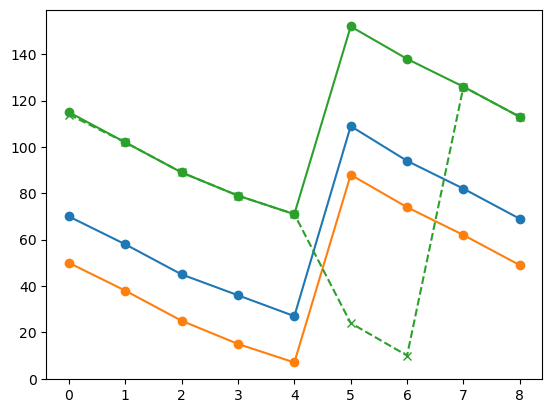

In [144]:
plt.plot([70, 58, 45, 36, 27, 109, 94, 82, 69], 'o-', label='b20 s8 delay20')
plt.plot([50, 38, 25, 15, 7, 88, 74, 62, 49], 'o-', label='b20 s8 delay0')
plt.plot([114, 102, 89, 79, 71, 24, 10, 126, 113], 'C2x--', label='b20 s8 delay64')
plt.plot([115, 102, 89, 79, 71, 24+128, 10+128, 126, 113], 'C2o-', label='b20 s8 delay64')

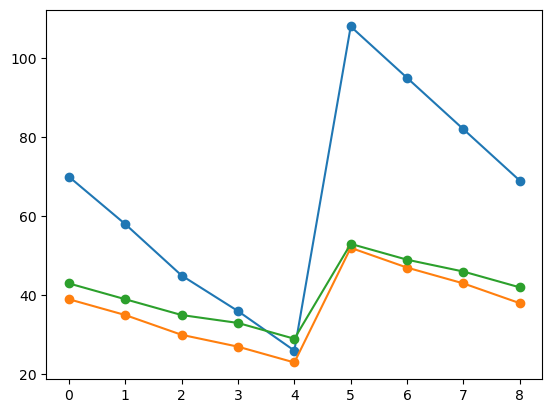

In [109]:
plt.plot([70, 58, 45, 36, 26, 108, 95, 82, 69], 'o-', label='b20 small8')
plt.plot([39, 35, 30, 27, 23, 52, 47, 43, 38], 'o-', label='b20-small12')
plt.plot([43,39,35,33,29,53,49,46,42], 'o-', label='b20-small23')

#plt.plot([32, 27, 23, 23, 22, 50, 43, 37, 31], 'o-', label='big32')  ## ts3==7bits
#plt.plot([27, 23, 23, 22, 22, 48, 39, 33, 26], 'o-', label='big48')  ## ts3==7bits

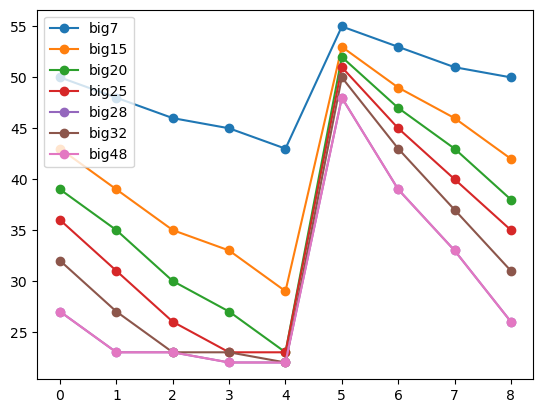

In [105]:
plt.plot([50, 48, 46, 45, 43, 55, 53, 51, 50], 'o-', label='big7')
plt.plot([43,39,35,33,29,53,49,46,42], 'o-', label='big15')
plt.plot([39, 35, 30, 27, 23, 52, 47, 43, 38], 'o-', label='big20')
plt.plot([36, 31, 26, 23, 23, 51, 45, 40, 35], 'o-', label='big25')
plt.plot([27, 23, 23, 22, 22, 48, 39, 33, 26], 'o-', label='big28')
plt.plot([32, 27, 23, 23, 22, 50, 43, 37, 31], 'o-', label='big32')  ## ts3==7bits
plt.plot([27, 23, 23, 22, 22, 48, 39, 33, 26], 'o-', label='big48')  ## ts3==7bits
plt.legend()

In [186]:
dut['inj'].set_phase(1)
raw = dut.get_data()
hit, ts_inj, ts_trig = interpreter.raw2list(raw)
np.sum(hit['ts3'].reshape([10, 12]), axis=1)

2024-04-04 19:02:04,002 - root - [WARNING ] (MainThread) get_data: error status=0x8 fifo_size=0 loop=98 ts=0/30


array([1202, 1200, 1200, 1207, 1205, 1202, 1201, 1201, 1200, 1209],
      dtype=uint64)

In [172]:
hit['ts3'][hit['comp']==1], 

array([71, 71, 71, 71, 71, 71, 71, 71, 71, 71], dtype=uint8)

In [174]:
hit['ts3'][hit['comp']==4]

array([70, 70, 70, 70, 71, 70, 70, 70, 70, 70], dtype=uint8)

In [177]:
hit['ts3'][hit['comp']==1]

array([71, 71, 71, 71, 71, 71, 71, 71, 71, 71], dtype=uint8)

In [180]:
for i in range(12):
    print('comp',i, hit['ts3'][hit['comp']==i])

comp 0 [89 89 89 89 89 89 89 89 89 89]
comp 1 [89 89 89 89 88 89 88 89 89 88]
comp 2 [86 87 86 87 86 86 86 87 87 86]
comp 3 [90 90 90 90 90 90 90 91 91 90]
comp 4 [86 86 86 86 85 86 85 86 86 86]
comp 5 [89 89 89 89 88 89 89 89 89 89]
comp 6 [85 85 85 85 85 85 85 85 85 85]
comp 7 [89 89 89 89 88 89 89 89 89 89]
comp 8 [87 87 87 87 87 87 86 87 87 87]
comp 9 [89 90 89 89 89 89 89 90 89 89]
comp 10 [89 89 89 89 88 89 88 89 89 89]
comp 11 [88 89 88 88 88 88 88 89 89 88]


In [185]:
0, np.average(np.sum(hit['ts3'].reshape([10, 12]), axis=1)), np.std(np.sum(hit['ts3'].reshape([10, 12]), axis=1))

(0, 1340.1, 2.4677925358506134)

In [187]:
1, np.average(np.sum(hit['ts3'].reshape([10, 12]), axis=1)), np.std(np.sum(hit['ts3'].reshape([10, 12]), axis=1))

(1, 1202.7, 3.0347981810987035)

In [190]:
1.25E-9/(1340.1-1202.7) * (3.0347981810987035+2.4677925358506134)/2

2.5029979607666133e-11

Exception in thread TcpReadoutThread:
Traceback (most recent call last):
  File "/home/thirono/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/home/thirono/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/home/thirono/Nextcloud-kit/workspace/basil/basil/TL/SiTcp.py", line 428, in _tcp_readout
    data = self._sock_tcp.recv(1024 * 8)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [Errno 104] Connection reset by peer
